# <font color=orange>**OpenCV ile Nesne Tespiti**</font>

## <font color=gold>**Kose Algilama**</font>

**Koseler,** iki kenarin kesisimi oldugu icin bu iki kenarin yonlerinin degistigi bir noktayi temsil eder.

Koseler, resimdeki renk gecisindeki bir **varyasyonu** temsil ettiginden, bu ***varyasyon*** aranir. Goruntu yogunlugundaki varyasyonu arayacagiz.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(294, 316)


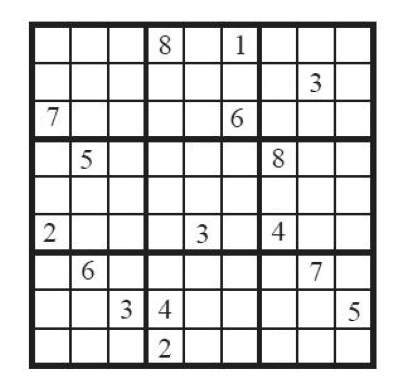

In [3]:
img = cv2.imread('sudoku.jpg',0)
img = np.float32(img) #ondalikli sayilara donusturulur
print(img.shape)
plt.figure(),plt.imshow(img, cmap='gray'), plt.axis('off');

### <font color=gray>**Harris Corner Detection**</font>

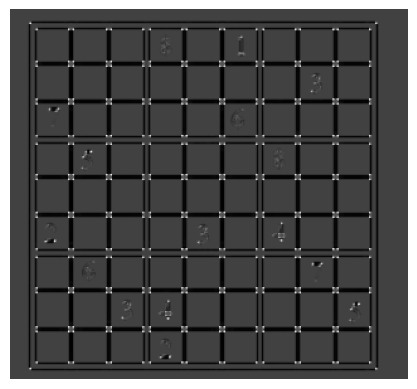

In [4]:
dst = cv2.cornerHarris(img,blockSize = 2, ksize = 3, k = 0.04)
#blockSize: Komsuluk boyutu
#ksize: Kutucugun boyutu

plt.figure(),plt.imshow(dst, cmap='gray'), plt.axis('off');

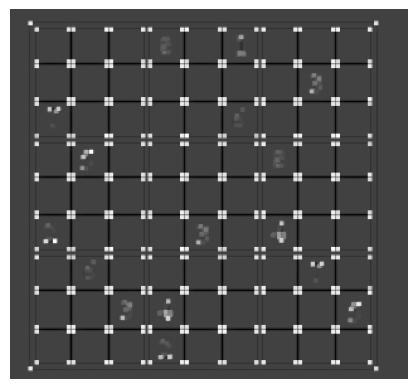

In [5]:
#Gorselligi iyilestirelim:
dst =  cv2.dilate(dst, None)
img[dst>0.2*dst.max()] = 1

plt.figure(),plt.imshow(dst, cmap='gray'), plt.axis('off');

### <font color=gray>**Shi  Tomsai Detection**</font>

In [11]:
img = cv2.imread('sudoku.jpg',0)
img = np.float32(img)

corners = cv2.goodFeaturesToTrack(img, 120, 0.01, 10)
#100 : istenilen kose sayisi
#0.01 : quality level
#10 : iki kose arasindaki min distance

corners = np.int64(corners)

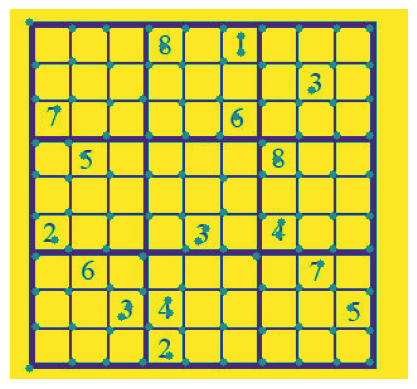

In [12]:
for i in corners:
    x,y = i.ravel() #duzlestirme
    cv2.circle(img, (x,y),3,(125,125,125),cv2.FILLED)
    
plt.imshow(img)
plt.axis('off');